In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT = '/data1/wgs_APA/validation_res/'
GEM0 = 'gem0/'
GEM1 = 'gem1/'
MAAPER_OUT = 'MAAPER_out/'

In [3]:
# list all the results in gem0 MAAPER_OUT directory
genes = [d for d in os.listdir(f'{ROOT}{GEM0}{MAAPER_OUT}')]
genes

['DEDD_res',
 'CREB5_res',
 'KDM2B_res',
 'CEP44_res',
 'RELB_res',
 'HOXA4_res',
 'SLC26A6_res',
 'PHAX_res',
 'PROX1_res',
 'NIP7_res',
 'UTRN_res',
 'PPP2CB_res',
 'HPS1_res',
 'GSC2_res',
 'TOR1B_res',
 'GLYR1_res',
 'PPARD_res',
 'KLF9_res',
 'UBE2D2_res',
 'KIN_res',
 'negative_res',
 'ZNF215_res',
 'NFIB_res',
 'ENSA_res',
 'NUP214_res',
 'TEAD3_res',
 'ZNF530_res',
 'NKX6_res',
 'RDH11_res',
 'MED1_res',
 'RELN_res',
 'ZNF527_res',
 'MECOM_res',
 'Ascl2_res',
 'MRPL9_res',
 'RBM15B_res',
 'HOMEZ_res',
 'MLEC_res',
 'IFITM2_res',
 'RPL37_res',
 'TAF15_res',
 'TFDP1_res',
 'TWIST1_res',
 'ZNF232_res',
 'HOXA3_res',
 'NR5A1_res',
 'ETS1_res',
 'ZDHHC6_res',
 'ZEB1_res',
 'KCNIP3_res',
 'MEX3D_res',
 'LRRC14_res',
 'LBX2_res',
 'znf623_res',
 'FOXE3_res',
 'ZNF345_res',
 'HNRPNC_res',
 'FNBP4_res',
 'SENP3_res',
 'DHX33_res',
 'HAUS7_res',
 'BRIP1_res',
 'EPB41L5_res',
 'RPS20_res',
 'SIX6_res',
 'HLCS_res',
 'PPP1R12A_res',
 'PIR_res',
 'BIRC2_res']

In [24]:
# Assuming you've already defined ROOT, GEM0, MAAPER_OUT, and genes

data = {}
for gene in genes:
    filepath = f'{ROOT}{GEM0}{MAAPER_OUT}{gene}/gene.txt'
    df = pd.read_csv(filepath, sep='\t')
    df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
    data[gene] = df.set_index('gene')['REDu'].to_dict()  # Assuming the gene name column is 'Gene'

matrix = pd.DataFrame(data).T


In [25]:
matrix.fillna(0, inplace=True)

In [27]:
matrix.shape

(69, 5930)

In [30]:
matrix.head()

,B3GALT6,PUSL1,SKI,RER1,DFFB,PHF13,VAMP3,PER3,H6PD,SLC25A33,...,NUDT7,PTBP1,RPP40,TSKU,ZNF726,MANBA,CCDC107,COPS7A,AP4S1,ZBTB25
DEDD_res,-1.470,0.0262,-0.258,-0.755,1.220,0.465,0.882,-0.988,-0.5570,-1.240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CREB5_res,0.888,-0.9660,-0.428,-0.991,0.000,0.838,1.160,0.000,-0.3290,-1.310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KDM2B_res,-0.103,-0.5590,0.676,-0.792,1.520,0.294,1.390,0.000,-0.4110,-0.790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CEP44_res,0.927,-1.4300,-3.530,-0.980,0.000,0.826,0.986,0.000,0.0473,-1.290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RELB_res,0.603,-1.2300,-0.114,-1.020,0.319,1.010,1.610,0.000,0.2710,-0.964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


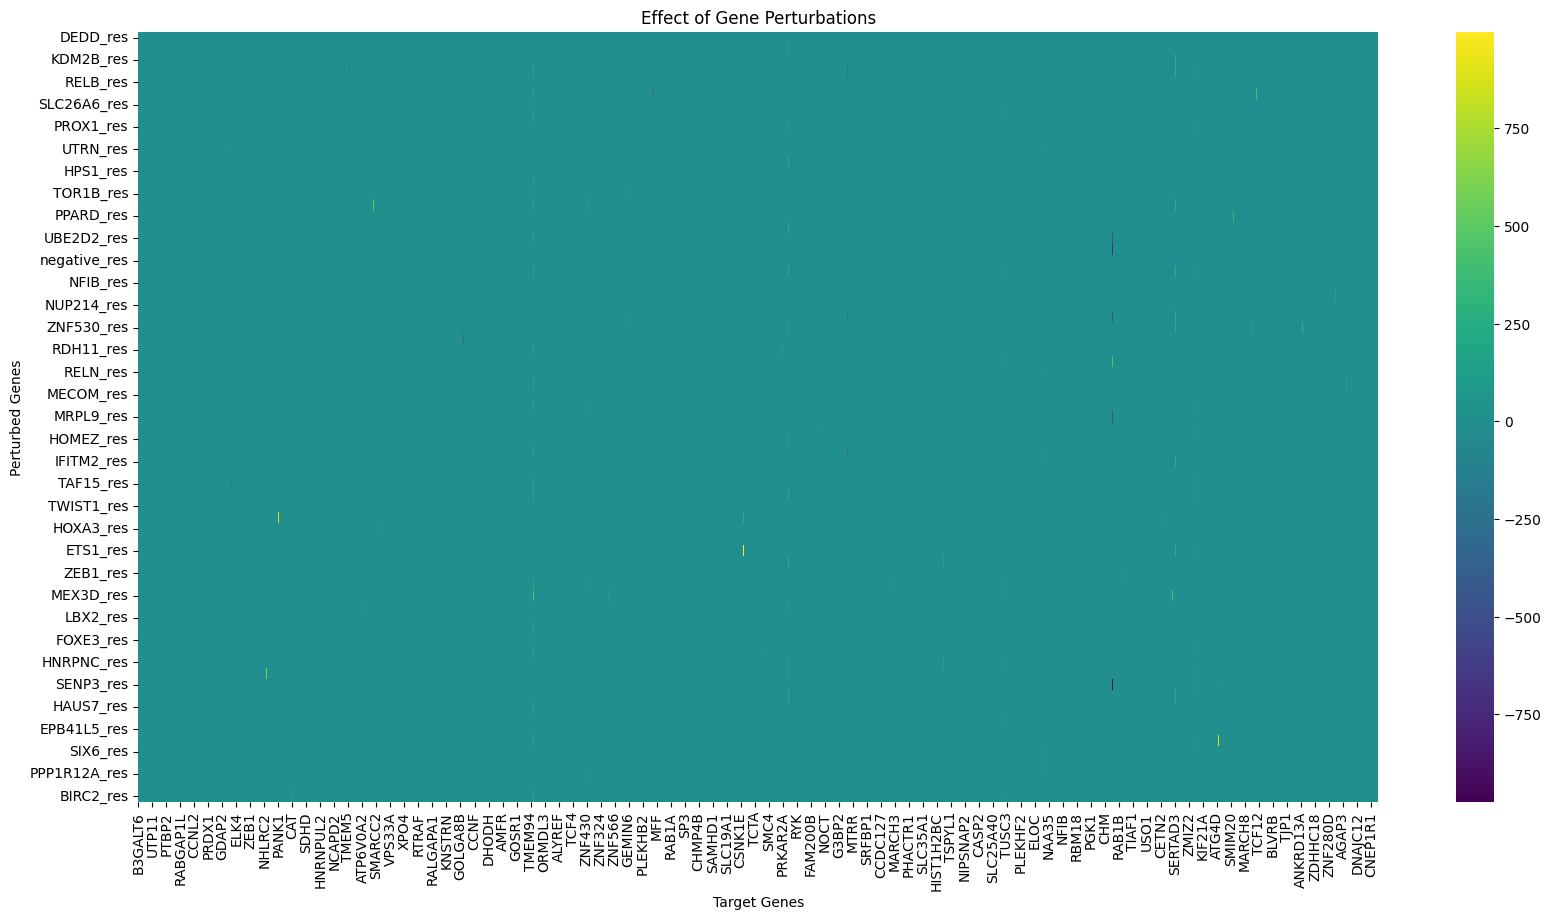

In [26]:
plt.figure(figsize=(20, 10))  # You can adjust the size based on your preference
sns.heatmap(matrix, cmap='viridis')
plt.title("Effect of Gene Perturbations")
plt.xlabel("Target Genes")
plt.ylabel("Perturbed Genes")
plt.show()


/home/aiden/anaconda3/envs/apa_wgs/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/aiden/anaconda3/envs/apa_wgs/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


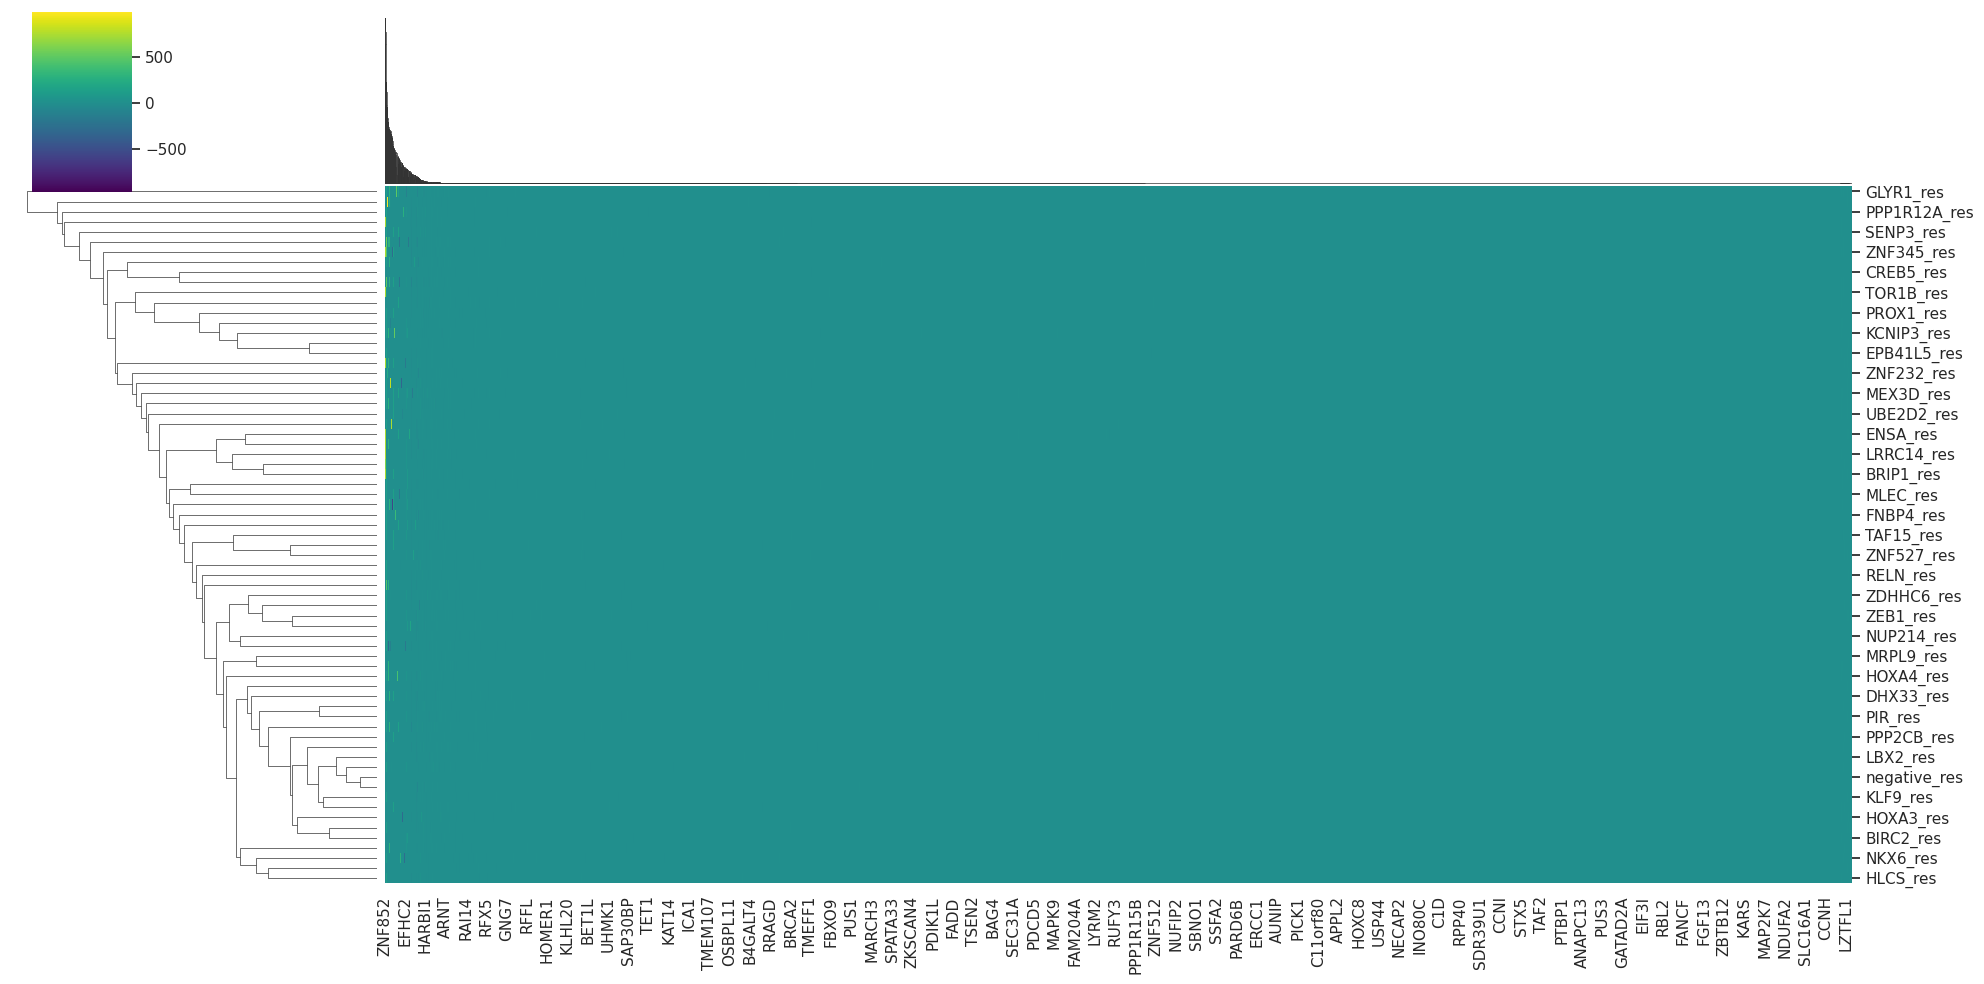

In [28]:
# Adjust figure size based on the matrix dimensions
sns.set(rc={'figure.figsize':(20, 10)})

cg = sns.clustermap(matrix, cmap='viridis', method='average', 
                    metric='euclidean', figsize=(20, 10), 
                    row_cluster=True, col_cluster=True)

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)  # Adjust this if the labels are overlapping
plt.show()


In [7]:
import statsmodels.stats.multitest as smm

def adjust_pvalues(df):
    """
    Adjust the p-values in the 'REDu.pval' column of the dataframe using the FDR method.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the 'REDu.pval' column.
    
    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'adjusted.pval' column.
    """
    
    # Extract the p-values from the dataframe
    pvals = df['REDu.pval'].values
    
    # Adjust the p-values using the Benjamini-Hochberg procedure
    adjusted_pvals = smm.multipletests(pvals, method='fdr_bh')[1]
    
    # Add the adjusted p-values to the dataframe
    df['adjusted.pval'] = adjusted_pvals
    
    return df
# Example usage:
# df_adjusted = adjust_pvalues(df)


In [6]:
data = {}
REDu_dict = {}
affected_genes_n = {}
REDu_mean_dict = {}
for gene in genes:
    filepath = f'{ROOT}{GEM0}{MAAPER_OUT}{gene}/gene.txt'
    df = pd.read_csv(filepath, sep='\t')
    # Remove rows with NaN or infinite values
    df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
    df = adjust_pvalues(df)
    # filter for significant REDu values REDu.pval < 0.05 & adjusted.pval < 0.01
    df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
    data[gene] = df.set_index('gene')['REDu'].to_dict()  # I see you've changed the column name to 'gene'. Adjusted accordingly.
    REDu_dict[gene] = df['REDu'].median()
    REDu_mean_dict[gene] = df['REDu'].mean()
    # add the number of significant REDu values
    affected_genes_n[gene] = len(df)


matrix = pd.DataFrame(data).T
print(matrix.shape)
matrix.head()

(69, 3375)


,RER1,MRTO4,CDC42,ZBTB40,CLIC4,TMEM50A,MACO1,ATPIF1,EIF3I,ZMYM4,...,PDPK1,PIGL,TMEM92,WDR43,BIRC6,PTPRA,MOCS3,CBY1,ITPR1,RAB11FIP1
DEDD_res,-0.755,-1.17,0.727,1.51,-1.99,0.570,3.43,-0.214,0.279,0.768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREB5_res,-0.991,NaN,0.649,NaN,-2.35,NaN,3.92,-0.196,0.470,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KDM2B_res,-0.792,NaN,0.769,NaN,NaN,NaN,NaN,NaN,0.246,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP44_res,-0.980,NaN,0.537,NaN,-1.39,0.413,NaN,-0.197,0.382,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELB_res,-1.020,NaN,0.618,NaN,-1.43,NaN,NaN,-0.194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrix.fillna(0, inplace=True)

In [92]:
threshold = 0.5 * len(matrix)
non_zero_counts = (matrix != 0).sum(axis=0)
filtered_genes = non_zero_counts[non_zero_counts > threshold].index

# Subset the matrix to retain only the filtered genes
filtered_matrix = matrix[filtered_genes]
filtered_matrix.shape

(69, 339)

/home/aiden/anaconda3/envs/apa_wgs/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/aiden/anaconda3/envs/apa_wgs/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x1000 with 0 Axes>

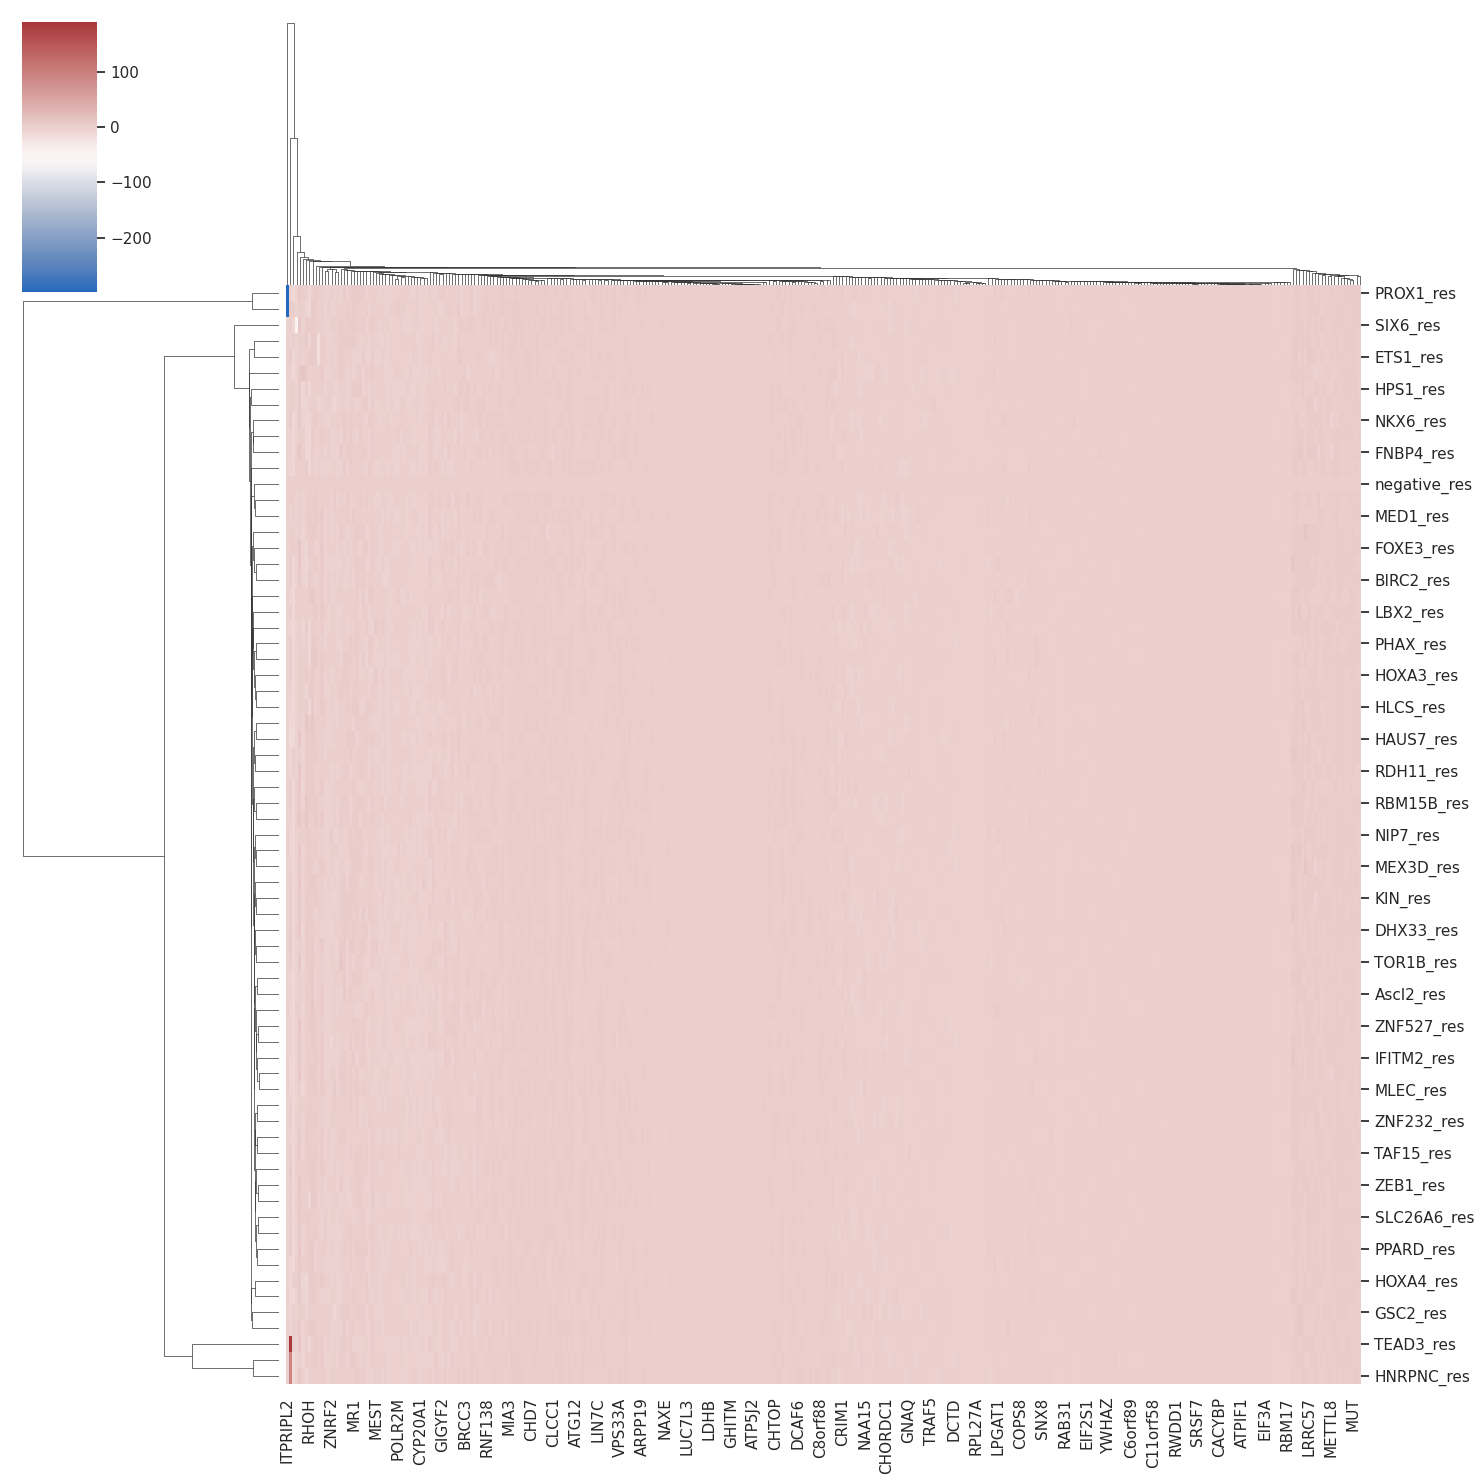

In [94]:
plt.figure(figsize=(10, 10))
sns.clustermap(filtered_matrix, method='average', cmap='vlag', row_cluster=True, col_cluster=True, figsize=(15, 15))
plt.show()

In [8]:
# turn REDu_dict to a dataframe
REDu_median_df = pd.DataFrame.from_dict(REDu_dict, orient='index')
REDu_median_df.columns = ['Median REDu']
REDu_median_df

,Median REDu
DEDD_res,-0.4050
CREB5_res,-0.5230
KDM2B_res,-0.5355
CEP44_res,-0.3415
RELB_res,0.3365
...,...
SIX6_res,0.2680
HLCS_res,-0.4770
PPP1R12A_res,0.1690
PIR_res,0.3275


In [10]:
# turn REDu_dict to a dataframe
REDu_mean_df = pd.DataFrame.from_dict(REDu_mean_dict, orient='index')
REDu_mean_df.columns = ['Mean REDu']
REDu_mean_df

,Mean REDu
DEDD_res,0.357304
CREB5_res,0.348945
KDM2B_res,-0.227177
CEP44_res,-0.708875
RELB_res,0.051005
...,...
SIX6_res,1.907301
HLCS_res,-0.115648
PPP1R12A_res,0.747627
PIR_res,-0.757723


In [9]:
# turn REDu_dict to a dataframe
REDu_gene_count = pd.DataFrame.from_dict(affected_genes_n, orient='index')
REDu_gene_count.columns = ['Count']
REDu_gene_count

,Count
DEDD_res,619
CREB5_res,608
KDM2B_res,522
CEP44_res,612
RELB_res,576
...,...
SIX6_res,584
HLCS_res,553
PPP1R12A_res,558
PIR_res,584


In [12]:
REDu_mean_df['effected genes number'] = REDu_gene_count['Count']
REDu_mean_df['Median REDu'] = REDu_median_df['Median REDu']
REDu_mean_df

,Mean REDu,effected genes number,Median REDu
DEDD_res,0.357304,619,-0.4050
CREB5_res,0.348945,608,-0.5230
KDM2B_res,-0.227177,522,-0.5355
CEP44_res,-0.708875,612,-0.3415
RELB_res,0.051005,576,0.3365
...,...,...,...
SIX6_res,1.907301,584,0.2680
HLCS_res,-0.115648,553,-0.4770
PPP1R12A_res,0.747627,558,0.1690
PIR_res,-0.757723,584,0.3275


In [14]:
REDu_mean_df['gene name'] = REDu_mean_df.index.str.split('_').str[0]
REDu_mean_df

,Mean REDu,effected genes number,Median REDu,gene name
DEDD_res,0.357304,619,-0.4050,DEDD
CREB5_res,0.348945,608,-0.5230,CREB5
KDM2B_res,-0.227177,522,-0.5355,KDM2B
CEP44_res,-0.708875,612,-0.3415,CEP44
RELB_res,0.051005,576,0.3365,RELB
...,...,...,...,...
SIX6_res,1.907301,584,0.2680,SIX6
HLCS_res,-0.115648,553,-0.4770,HLCS
PPP1R12A_res,0.747627,558,0.1690,PPP1R12A
PIR_res,-0.757723,584,0.3275,PIR


posx and posy should be finite values
posx and posy should be finite values


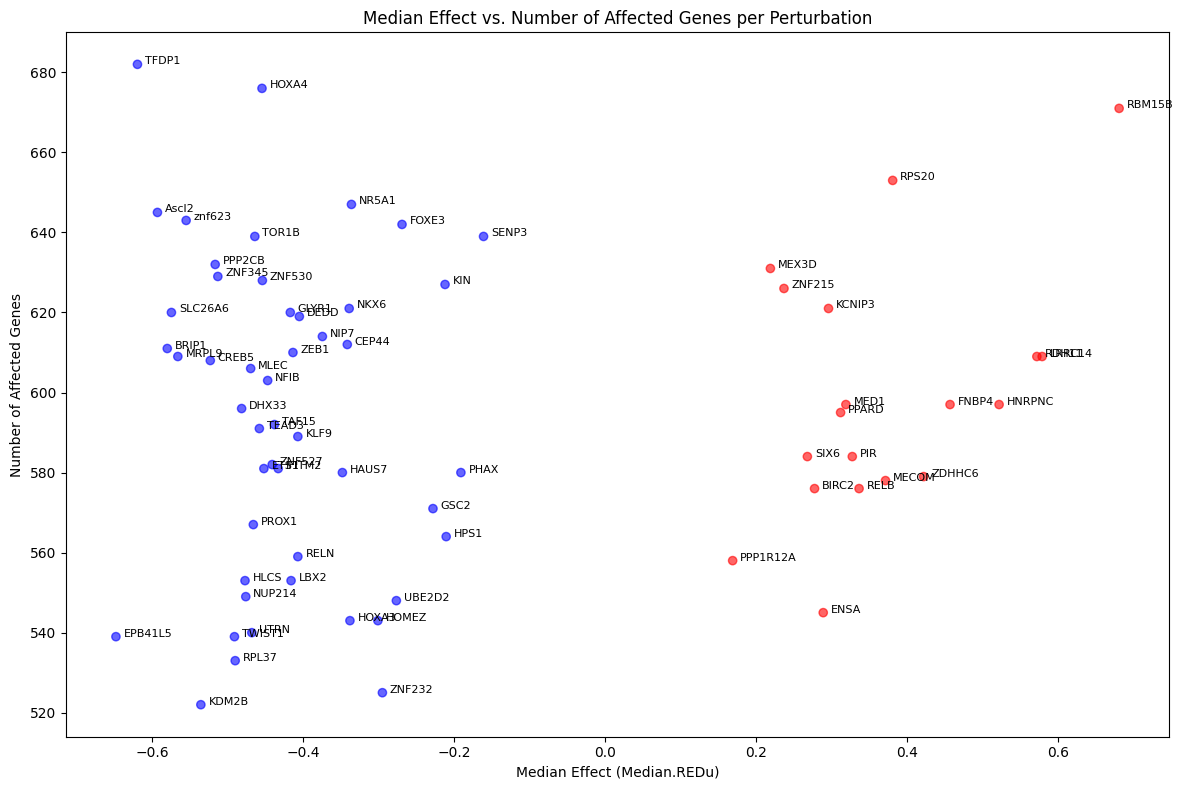

In [18]:
plt.figure(figsize=(12, 8))

# Determine the colors based on positive or negative Median REDu values
colors = ['red' if val > 0 else 'blue' for val in REDu_mean_df['Median REDu']]

plt.scatter(REDu_mean_df['Median REDu'], REDu_mean_df['effected genes number'], c=colors, alpha=0.6)

# Adding gene names to each point
for i, gene_name in enumerate(REDu_mean_df['gene name']):
    plt.text(REDu_mean_df['Median REDu'].iloc[i] + 0.01, REDu_mean_df['effected genes number'].iloc[i], gene_name, fontsize=8, ha='left')

plt.xlabel('Median Effect (Median.REDu)')
plt.ylabel('Number of Affected Genes')
plt.title('Median Effect vs. Number of Affected Genes per Perturbation')
plt.tight_layout()  # This ensures that the gene names do not get cut off from the figure
plt.show()


posx and posy should be finite values
posx and posy should be finite values


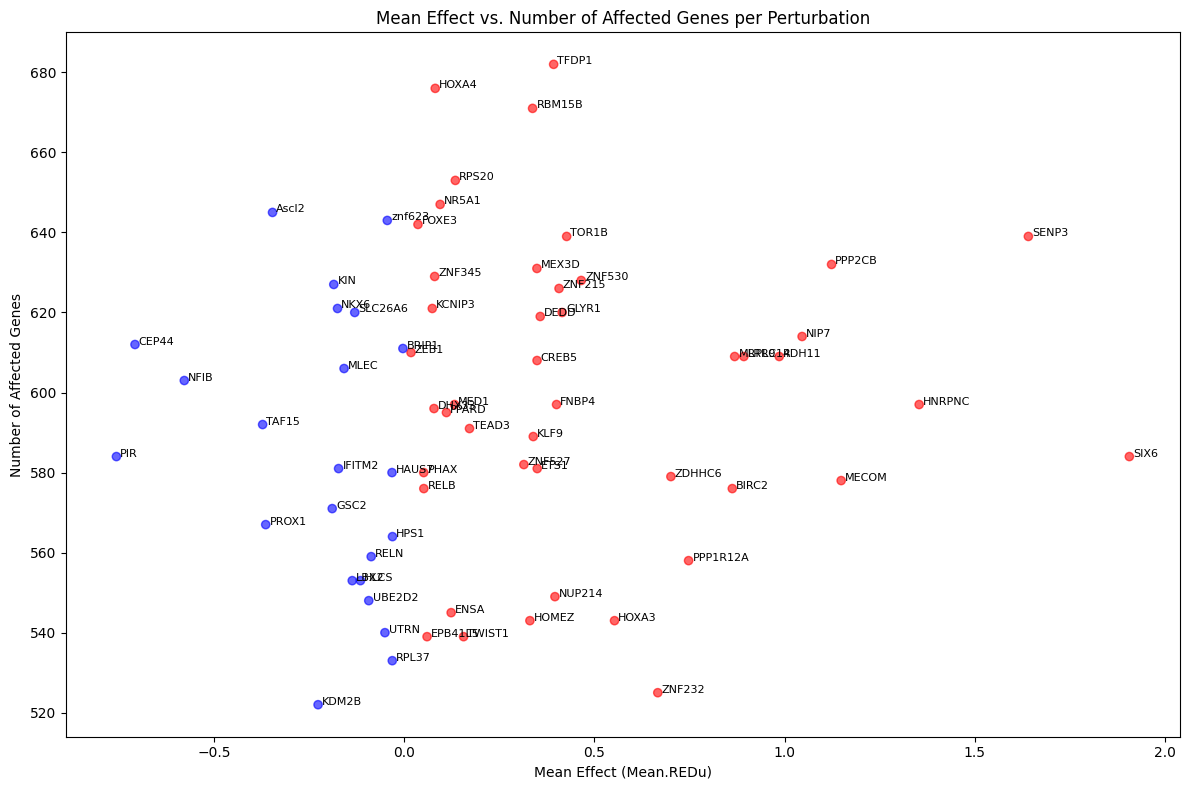

In [20]:
plt.figure(figsize=(12, 8))

# Determine the colors based on positive or negative Median REDu values
colors = ['red' if val > 0 else 'blue' for val in REDu_mean_df['Mean REDu']]

plt.scatter(REDu_mean_df['Mean REDu'], REDu_mean_df['effected genes number'], c=colors, alpha=0.6)

# Adding gene names to each point
for i, gene_name in enumerate(REDu_mean_df['gene name']):
    plt.text(REDu_mean_df['Mean REDu'].iloc[i] + 0.01, REDu_mean_df['effected genes number'].iloc[i], gene_name, fontsize=8, ha='left')

plt.xlabel('Mean Effect (Mean.REDu)')
plt.ylabel('Number of Affected Genes')
plt.title('Mean Effect vs. Number of Affected Genes per Perturbation')
plt.tight_layout()  # This ensures that the gene names do not get cut off from the figure
plt.show()


In [23]:
data = {}
REDu_dict = {}
affected_genes_n = {}
REDu_mean_dict = {}
genes = [d for d in os.listdir(f'{ROOT}{GEM1}{MAAPER_OUT}')]

for gene in genes:
    try:
        filepath = f'{ROOT}{GEM1}{MAAPER_OUT}{gene}/gene.txt'
        df = pd.read_csv(filepath, sep='\t')
        # Remove rows with NaN or infinite values
        df = df[~df['REDu'].isin([np.nan, np.inf, -np.inf])]
        df = adjust_pvalues(df)
        # filter for significant REDu values REDu.pval < 0.05 & adjusted.pval < 0.01
        df = df[(df['REDu.pval'] < 0.05) & (df['adjusted.pval'] < 0.01)]
        data[gene] = df.set_index('gene')['REDu'].to_dict()  # I see you've changed the column name to 'gene'. Adjusted accordingly.
        REDu_dict[gene] = df['REDu'].median()
        REDu_mean_dict[gene] = df['REDu'].mean()
        # add the number of significant REDu values
        affected_genes_n[gene] = len(df)
    except:
        continue


matrix = pd.DataFrame(data).T
print(matrix.shape)

REDu_median_df = pd.DataFrame.from_dict(REDu_dict, orient='index')
REDu_median_df.columns = ['Median REDu']

REDu_mean_df = pd.DataFrame.from_dict(REDu_mean_dict, orient='index')
REDu_mean_df.columns = ['Mean REDu']
REDu_gene_count = pd.DataFrame.from_dict(affected_genes_n, orient='index')
REDu_gene_count.columns = ['Count']
REDu_mean_df['effected genes number'] = REDu_gene_count['Count']
REDu_mean_df['Median REDu'] = REDu_median_df['Median REDu']
REDu_mean_df['gene name'] = REDu_mean_df.index.str.split('_').str[0]
REDu_mean_df


(68, 3446)


,Mean REDu,effected genes number,Median REDu,gene name
DEDD_res,-0.272098,506,-0.3525,DEDD
CREB5_res,-0.093586,500,-0.4220,CREB5
KDM2B_res,0.333655,589,0.6890,KDM2B
CEP44_res,1.007034,652,0.6995,CEP44
RELB_res,0.709337,778,0.9420,RELB
...,...,...,...,...
RPS20_res,0.645363,776,0.9610,RPS20
SIX6_res,0.530095,697,0.9600,SIX6
HLCS_res,1.256166,775,1.0100,HLCS
PPP1R12A_res,-0.000154,735,0.9110,PPP1R12A


posx and posy should be finite values
posx and posy should be finite values


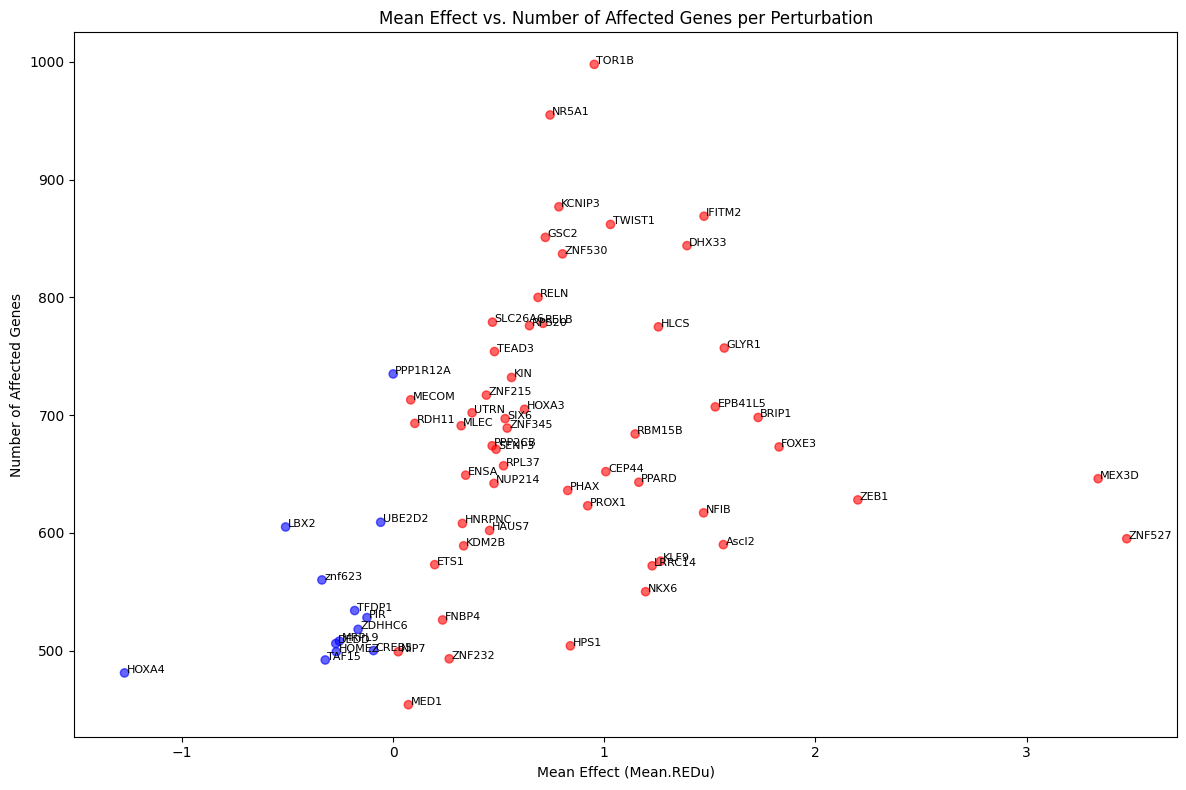

In [24]:
plt.figure(figsize=(12, 8))

# Determine the colors based on positive or negative Median REDu values
colors = ['red' if val > 0 else 'blue' for val in REDu_mean_df['Mean REDu']]

plt.scatter(REDu_mean_df['Mean REDu'], REDu_mean_df['effected genes number'], c=colors, alpha=0.6)

# Adding gene names to each point
for i, gene_name in enumerate(REDu_mean_df['gene name']):
    plt.text(REDu_mean_df['Mean REDu'].iloc[i] + 0.01, REDu_mean_df['effected genes number'].iloc[i], gene_name, fontsize=8, ha='left')

plt.xlabel('Mean Effect (Mean.REDu)')
plt.ylabel('Number of Affected Genes')
plt.title('Mean Effect vs. Number of Affected Genes per Perturbation')
plt.tight_layout()  # This ensures that the gene names do not get cut off from the figure
plt.show()


posx and posy should be finite values
posx and posy should be finite values


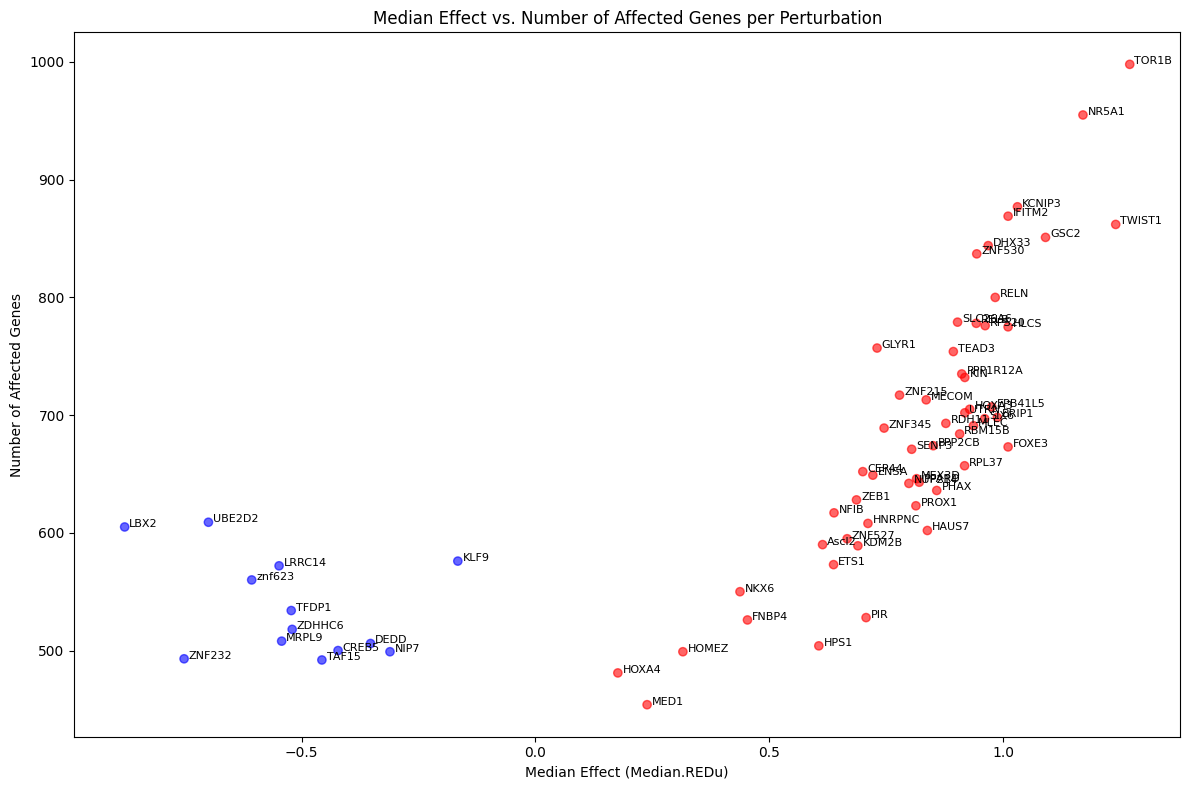

In [25]:
plt.figure(figsize=(12, 8))

# Determine the colors based on positive or negative Median REDu values
colors = ['red' if val > 0 else 'blue' for val in REDu_mean_df['Median REDu']]

plt.scatter(REDu_mean_df['Median RloEDu'], REDu_mean_df['effected genes number'], c=colors, alpha=0.6)

# Adding gene names to each point
for i, gene_name in enumerate(REDu_mean_df['gene name']):
    plt.text(REDu_mean_df['Median REDu'].iloc[i] + 0.01, REDu_mean_df['effected genes number'].iloc[i], gene_name, fontsize=8, ha='left')

plt.xlabel('Median Effect (Median.REDu)')
plt.ylabel('Number of Affected Genes')
plt.title('Median Effect vs. Number of Affected Genes per Perturbation')
plt.tight_layout()  # This ensures that the gene names do not get cut off from the figure
plt.show()


In [ ]:
# 1- JW data:  reselect the genes in that data and check their APA effect
# 2- select the genes that are consistent in JW and GEM0 and GEM1
# 3- literature search on the top genes
# 4- re do plots, check the Satija paper for the plots